# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
#Data 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
#Models
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering, AffinityPropagation, KMeans
#Metrics
from sklearn import metrics
from itertools import cycle

## Function to Compare Methods and Plot Results

In [8]:
def compare_clusters(X_trn, y_trn, centers):
    
    #### Define the Models ####
    ###########################
    
    ### K means ###
    # Define the number of clusters
    n_clusters=len(set(y_trn))
    # Calculate predicted values.
    km_y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_trn)

    ### Mean Shift ###
    # Set bandwidth
    bandwidth = estimate_bandwidth(X_trn, quantile=0.2, n_samples=500)
    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_trn)
    # Extract cluster assignments for each data point.
    ms_labels = ms.labels_
    # Coordinates of the cluster centers.
    ms_cluster_centers = ms.cluster_centers_

    ### Spectral ###
    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_trn)
    #Predicted clusters.
    sc_predict=sc.fit_predict(X_trn)
    
    ### Affinity Propagation ###
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation(preference=-50, damping=0.9).fit(X_trn)
    # Pull the number of clusters and cluster assignments for each data point.
    af_cluster_centers_indices = af.cluster_centers_indices_
    af_n_clusters_ = len(af_cluster_centers_indices)
    af_labels = af.labels_
    
    ### Plot the figures ###
    ########################
    
    fig, ax = plt.subplots(2, 2, figsize=(12,8))
    
    ### K Means ###
    ax[0,0].scatter(X_trn[:, 0], X_trn[:, 1], c=km_y_pred)  
    ax[0,0].scatter([x[0] for x in centers], [x[1] for x in centers],
                s=200, marker='d', color='black', alpha=0.5)
    ax[0,0].set_title('K-Means')
    
    ### Mean Shift ###
    ax[0,1].scatter(X_trn[:, 0], X_trn[:, 1], c=ms_labels)
    ax[0,1].scatter([x[0] for x in centers], [x[1] for x in centers],
                s=200, marker='d', color='black', alpha=0.5)    
    ax[0,1].set_title("Mean Shift (Est. clusters: {})".format(len(np.unique(ms_labels))))
    
    ### Spectral ###
    ax[1,0].scatter(X_trn[:, 0], X_trn[:, 1], c=sc_predict)
    ax[1,0].scatter([x[0] for x in centers], [x[1] for x in centers],
                s=200, marker='d', color='black', alpha=0.5)
    ax[1,0].set_title('Spectral')
    
    ### Affinity Propagation ###
    
    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(af_n_clusters_), colors):
        class_members = af_labels == k
        cluster_center = X_trn[af_cluster_centers_indices[k]]
        ax[1,1].plot(X_trn[class_members, 0], X_trn[class_members, 1], col + '.')
        ax[1,1].plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_trn[class_members]:
            ax[1,1].plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)      
    
    ax[1,1].scatter([x[0] for x in centers], [x[1] for x in centers],
                s=200, marker='d', color='black', alpha=0.5)
    ax[1,1].set_title('Affinity Propagation (Est. clusters: {})'.format(af_n_clusters_))
    
    plt.show()
    
    
    #### Print Crosstabs ####
    #########################
    print('K means crosstabs:')
    print(pd.crosstab(km_y_pred, y_trn))
    
    print('\nMean shift crosstabs:')
    print(pd.crosstab(ms_labels, y_trn))
    
    print('\nSpectral crosstabs:')
    print(pd.crosstab(sc_predict, y_trn))

### Configuration 1: Clusters = 2

Text(0.5, 1.0, '2 Clusters')

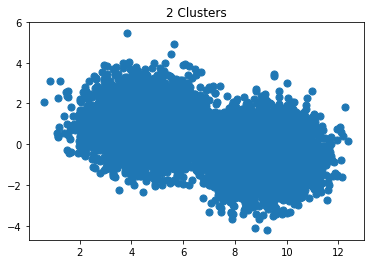

In [9]:
### Config1: Plot the data
centers1 = [[9,-0.5], [4.5,1]]

X1, y1 = make_blobs(n_samples=10000,
                    centers=centers1,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

plt.scatter(X1[:, 0], X1[:, 1], s=50);
plt.title('{} Clusters'.format(len(centers1)))

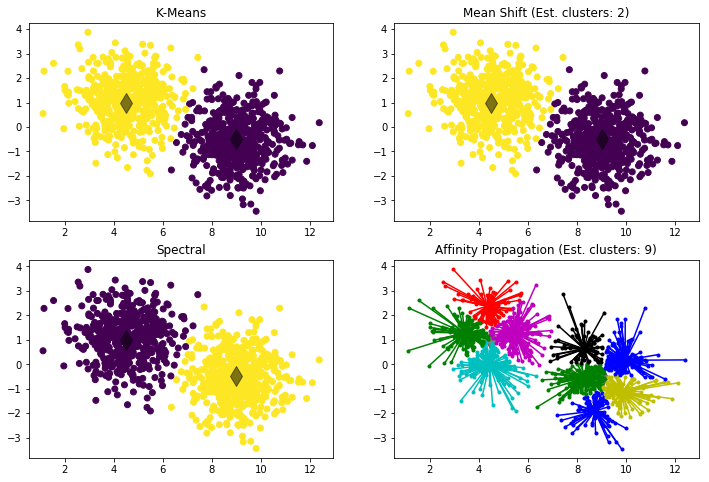

K means crosstabs:
col_0    0    1
row_0          
0      506    4
1        6  484

Mean shift crosstabs:
col_0    0    1
row_0          
0      506    4
1        6  484

Spectral crosstabs:
col_0    0    1
row_0          
0        6  484
1      506    4


In [10]:
#Config1 Test the Models
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.9, random_state=42)

compare_clusters(X1_train, y1_train, centers1)

K-Means, Mean Shift, and Affinity all had virtually the same results, while Spectral had an inverse effect.


### Configuration 2: Clusters = 4

Text(0.5, 1.0, '4 Clusters')

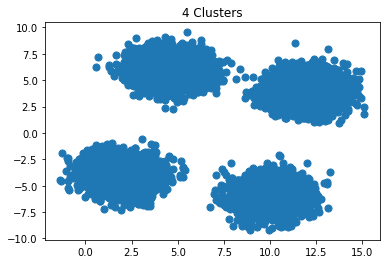

In [11]:
### Config2: Plot the data
centers2 = [[10,-6], [4.5,6], [2,-4], [12,4]]

X2, y2 = make_blobs(n_samples=10000,
                    centers=centers2,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

plt.scatter(X2[:, 0], X2[:, 1], s=50);
plt.title('{} Clusters'.format(len(centers2)))

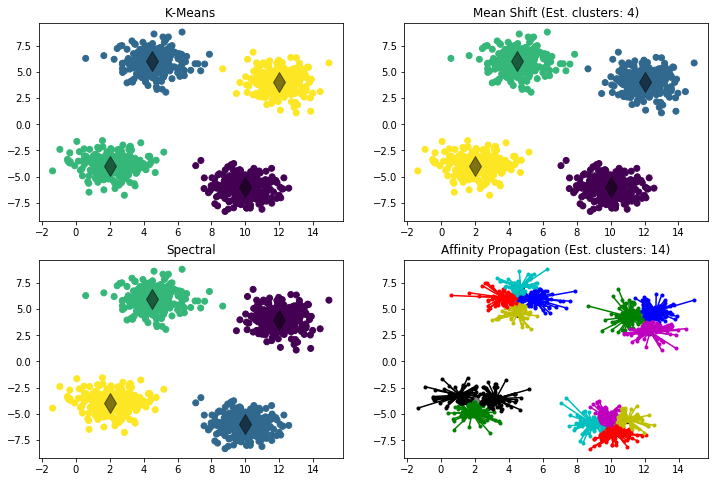

K means crosstabs:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  239    0    0
2        0    0  238    0
3        0    0    0  250

Mean shift crosstabs:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0    0  250
2        0  239    0    0
3        0    0  238    0

Spectral crosstabs:
col_0    0    1    2    3
row_0                    
0        0    0    0  249
1      273    0    0    0
2        0  239    0    1
3        0    0  238    0


In [12]:
#Config2 Test the Models
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.9, random_state=42)

compare_clusters(X2_train, y2_train, centers2)

### Configuration 3: Clusters = 7

Text(0.5, 1.0, '7 Clusters')

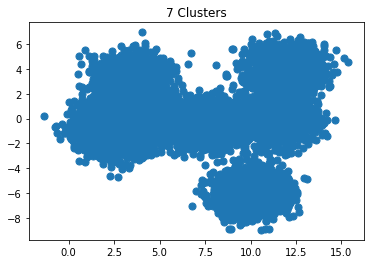

In [18]:
### Config3: Plot the data
centers3 = [[10,-6], [3.5,3], [2.5,-1], [12,4],[3,0], [11.5,0], [7.5,-0.5]]

X3, y3 = make_blobs(n_samples=10000,
                    centers=centers3,
                    cluster_std=1,
                    n_features=2,
                    random_state=42)

plt.scatter(X3[:, 0], X3[:, 1], s=50);
plt.title('{} Clusters'.format(len(centers3)))

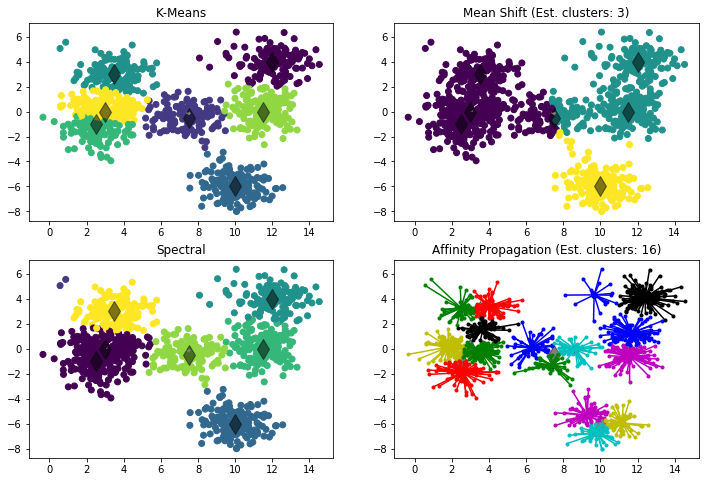

K means crosstabs:
col_0    0    1   2    3    4    5    6
row_0                                  
0        0    0   0  132    0    4    0
1        0    0   4    0    6    1  118
2      149    0   0    0    0    0    2
3        0  141   1    0    5    0    0
4        0    0  88    0   29    0    0
5        0    0   0    3    0  145    2
6        0   14  54    0  101    0    1

Mean shift crosstabs:
col_0    0    1    2    3    4    5   6
row_0                                  
0        0  155  147    0  141    0  57
1        0    0    0  135    0  149  59
2      149    0    0    0    0    1   7

Spectral crosstabs:
col_0    0    1    2    3    4    5    6
row_0                                   
0        0   11  143    0  128    0    2
1        0    2    0    0    0    0    0
2      149    0    0    0    0    0    2
3        0    0    0  128    0    4    0
4        0    0    0    7    0  144    2
5        0    0    3    0    3    2  117
6        0  142    1    0   10    0    0


In [19]:
#Config3 Test the Models
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.9, random_state=42)

compare_clusters(X3_train, y3_train, centers3)

### Summary:
> Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

**K-Means, Mean-Shift, & Spectral:**
The first and third configurations had overlapping data, while the second was noticeably separate clusters. All three performed equally as well as the next in my first configuration with 2 clusters overlapping.

**K-Means:** K means perfeormed fairly well when clusters overlapped. It would probably work best when clusters are obvious, even if there is some overlapping. 

**Mean-Shift:** This performed just as well as kmeans in the first two configurations, but in the last configuration with relatively many clusters and significant overlapping, it performed poorly only classifiying 3 out of 7 clusters. This would work best when there are no defined clusters and you need the model to create them for you. After running and seein gthe results, you could fine tune it to the desired amount of models.

**Spectral:** In the second configuration it somehow misclassfied a point, even though the clusters were reasonably separated. Then in the last configuration it missed out on an entire cluster. It would probably work best when clusters are obvious, with minimal overlap. I'm not entirely sure what would be the best use for this in comparison to the other three models.

**Affinity Propagation:** Created way more clusters than were necessary every time. This would work best when I actually have a large amount of data and many more clusters than what I came up with here.